In [3]:
import numpy as np          # fundamental package for scientific computing
import xarray as xr

import os
import glob

### Composite Analysis

- compute anomalies
- retrieve composite years

In [4]:
files = sorted(glob.glob('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/*.nc'))

In [3]:
temp_anomalies  = []
salt_anomalies  = []
sigma_anomalies = []
hmxl_anomalies  = []
shf_anomalies  = []
ssh_anomalies  = []

for i in range(len(files)):
    try:
        ds = xr.open_dataset(files[i])
        print(f"{files[i]} exists")
        # Do further processing with the dataset 'ds' if needed
    except ValueError as e:
        print(f"Error opening dataset from file {files[i]}: {e}")
        # Handle the exception, for example, continue with the next file
        continue
    
    # TEMP
    period1_avg_temp = ds['TEMP'].isel(time=slice(0,35)).mean(dim='time')  
    period2_avg_temp = ds['TEMP'].isel(time=slice(45,59)).mean(dim='time')
    difference_temp = period2_avg_temp - period1_avg_temp
    temp_anomalies.append(difference_temp)
    
    # SALT
    period1_avg_salt = ds['SALT'].isel(time=slice(0,35)).mean(dim='time')  
    period2_avg_salt = ds['SALT'].isel(time=slice(45,59)).mean(dim='time')
    difference_salt = period2_avg_salt - period1_avg_salt
    salt_anomalies.append(difference_salt)
    
    # SIGMA_2
    period1_avg_sigma = ds['SIGMA_2'].isel(time=slice(0,35)).mean(dim='time')  
    period2_avg_sigma = ds['SIGMA_2'].isel(time=slice(45,59)).mean(dim='time')
    difference_sigma = period2_avg_sigma - period1_avg_sigma
    sigma_anomalies.append(difference_sigma)
    
    # HMXL
    period1_avg_hmxl = ds['HMXL'].isel(time=slice(0,35)).mean(dim='time')  
    period2_avg_hmxl = ds['HMXL'].isel(time=slice(45,59)).mean(dim='time')
    difference_hmxl = period2_avg_hmxl - period1_avg_hmxl
    hmxl_anomalies.append(difference_hmxl)
    
    # SHF
    period1_avg_shf = ds['SHF'].isel(time=slice(0,35)).mean(dim='time')  
    period2_avg_shf = ds['SHF'].isel(time=slice(45,59)).mean(dim='time')
    difference_shf = period2_avg_shf - period1_avg_shf
    shf_anomalies.append(difference_shf)
    
    # SSH
    period1_avg_ssh = ds['SSH'].isel(time=slice(0,35)).mean(dim='time')  
    period2_avg_ssh = ds['SSH'].isel(time=slice(45,59)).mean(dim='time')
    difference_ssh = period2_avg_ssh - period1_avg_ssh
    ssh_anomalies.append(difference_ssh)


/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_1231.001.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_1231.003.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_1231.004.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_1231.020.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_1251.010.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_1281.010.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_1281.012.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_1281.015.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_1281.017.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_1281.020.nc exists
Error opening dataset from file /Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_1301.001.nc: did not find a match in any of xarray's currently 

In [4]:
# Combine the list of 3D fields into a single xarray dataset
temp_anomaly = xr.concat(temp_anomalies, dim='file').mean(dim='file')
salt_anomaly = xr.concat(salt_anomalies, dim='file').mean(dim='file')
sigma_anomaly = xr.concat(sigma_anomalies, dim='file').mean(dim='file')
hmxl_anomaly = xr.concat(hmxl_anomalies, dim='file').mean(dim='file')
shf_anomaly = xr.concat(shf_anomalies, dim='file').mean(dim='file')
ssh_anomaly = xr.concat(ssh_anomalies, dim='file').mean(dim='file')

In [5]:
temp_anomaly.to_netcdf(os.path.expanduser('~/phase1_CONDA/')+'/results/composites/temp_anomaly.nc')
salt_anomaly.to_netcdf(os.path.expanduser('~/phase1_CONDA/')+'/results/composites/salt_anomaly.nc')
sigma_anomaly.to_netcdf(os.path.expanduser('~/phase1_CONDA/')+'/results/composites/sigma_anomaly.nc')
hmxl_anomaly.to_netcdf(os.path.expanduser('~/phase1_CONDA/')+'/results/composites/hmxl_anomaly.nc')
shf_anomaly.to_netcdf(os.path.expanduser('~/phase1_CONDA/')+'/results/composites/shf_anomaly.nc')
ssh_anomaly.to_netcdf(os.path.expanduser('~/phase1_CONDA/')+'/results/composites/ssh_anomaly.nc')

# Plot output

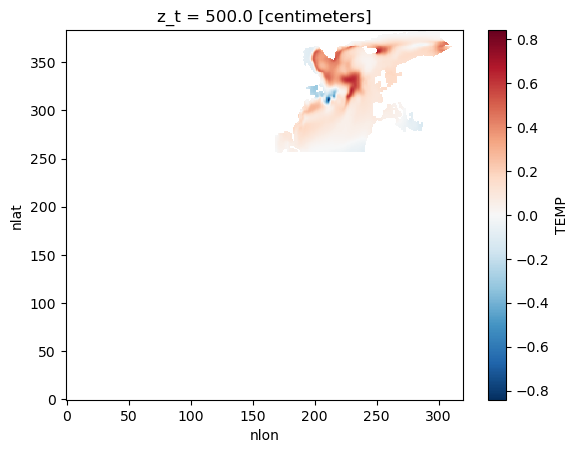

In [6]:
temp_anomaly.isel(z_t=0).plot()

# Prepare annual composites

In [19]:
var = 'TEMP'
#['TEMP', 'SALT', 'SIGMA_2', 'HMXL', 'SHF', 'SSH']

var_years = []
for t in range(60):
    var_year = []
    for i in range(len(files)):
        try:
            ds = xr.open_dataset(files[i])
        except ValueError as e:
            continue

        # TEMP
        ds_file = ds[var].isel(time=t)
        var_year.append(ds_file)
        
    ds_comp = xr.concat(var_year, dim='file').mean(dim='file')
    var_years.append(ds_comp)

ds_var_annual = xr.concat(var_years, dim='time')

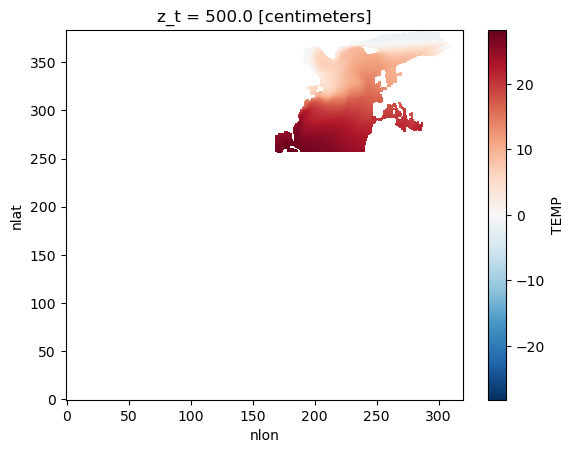

In [20]:
temp_annual.isel(z_t=0, time=0).plot()